<div class="alert alert-info">
    

# Assignment 3: Chicago Crimes
# MSDS420 
<br>
<br>

    
**Author:**  Atef Bader, PhD
    
**Edit:**  Code refactored by EA with additional changes by EA & SD<br>
**Edit:**  v2.0 Eliminated intro text. Question changes by EA and SD (March 2022)<br> 
**Edit:**  v2.1 Added pip install instructions for Mac SD (April 2022)
<br>
</div>

# Deliverables:

- Submit two files that are labeled: <b><font color = 'red'>YourLastName_Assignment_3<b></font> that have the following formats:

 1. Your **HTML** that has your Source code and output
 2. Your **ipynb script** that has your Source code and output


# Objectives:

- Use SQL to execute different queries to retrieve data from Chicago Crime dataset and Police statins dataset
- Use Geospatial queries  to locate **police stations** and **gun** related crimes (with arrest or no arrest) in every district on **Choropleth** map
- Use Geospatial queries  to provide **descriptive stat** for every **district** on Choropleth map
- Use Geospatial queries  to locate the **Block** that is the furthest (Maximum Distance) from the police station that has gun related crime resulted in arrest


# Formatting Python Code:

When programming in Python, refer to Kenneth Reitz’ PEP 8: The Style Guide for Python Code: http://pep8.org/ (Links to an external site.)Links to an external site. There is the Google style guide for Python at https://google.github.io/styleguide/pyguide.html (Links to an external site.)Links to an external site. Comment often and in detail.



# Descriptions and Requirement Specifications

# Chicago Police Department

Chicago police department  __[CPD](https://home.chicagopolice.org/community/districts/11th-district-harrison/)__  issues and publishes on daily basis on its website crime alerts, and press releases for the different __[districts](https://home.chicagopolice.org/community/districts/)__ .

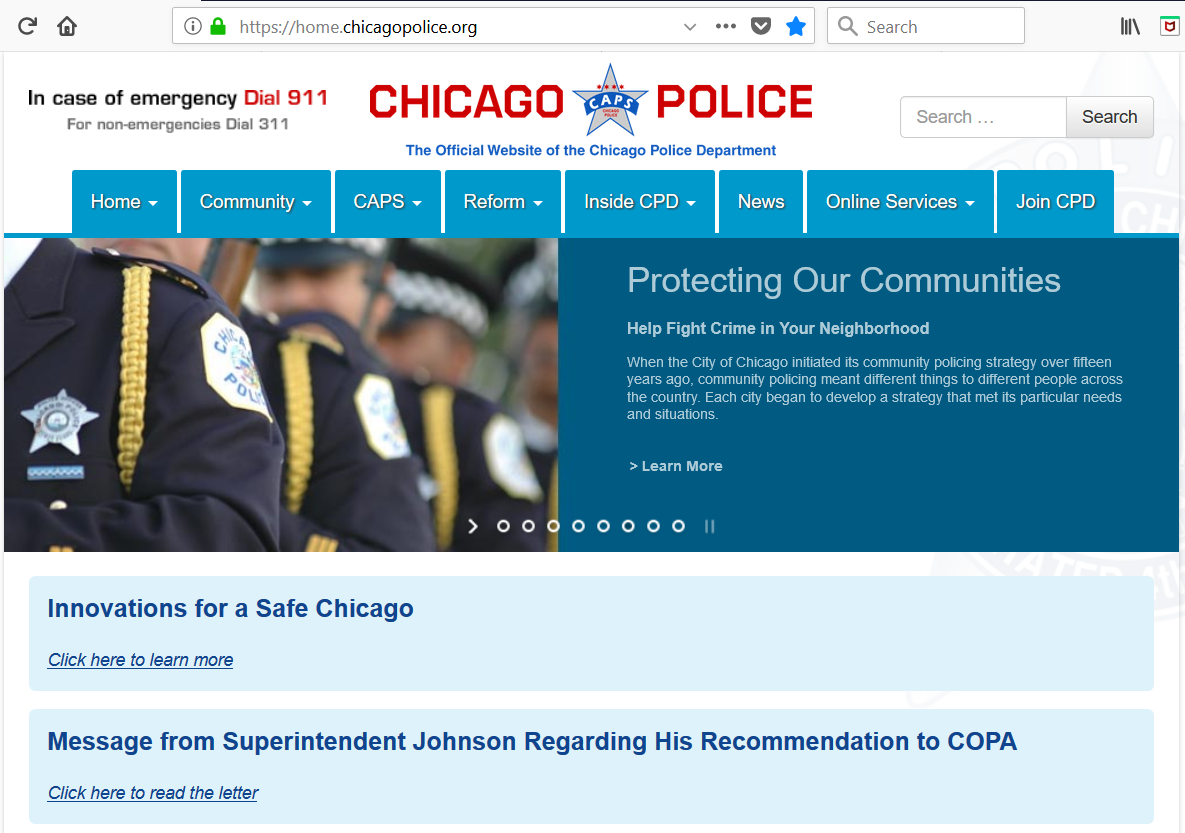



# The CPD categoizes the crimes into 8 categories as follows:

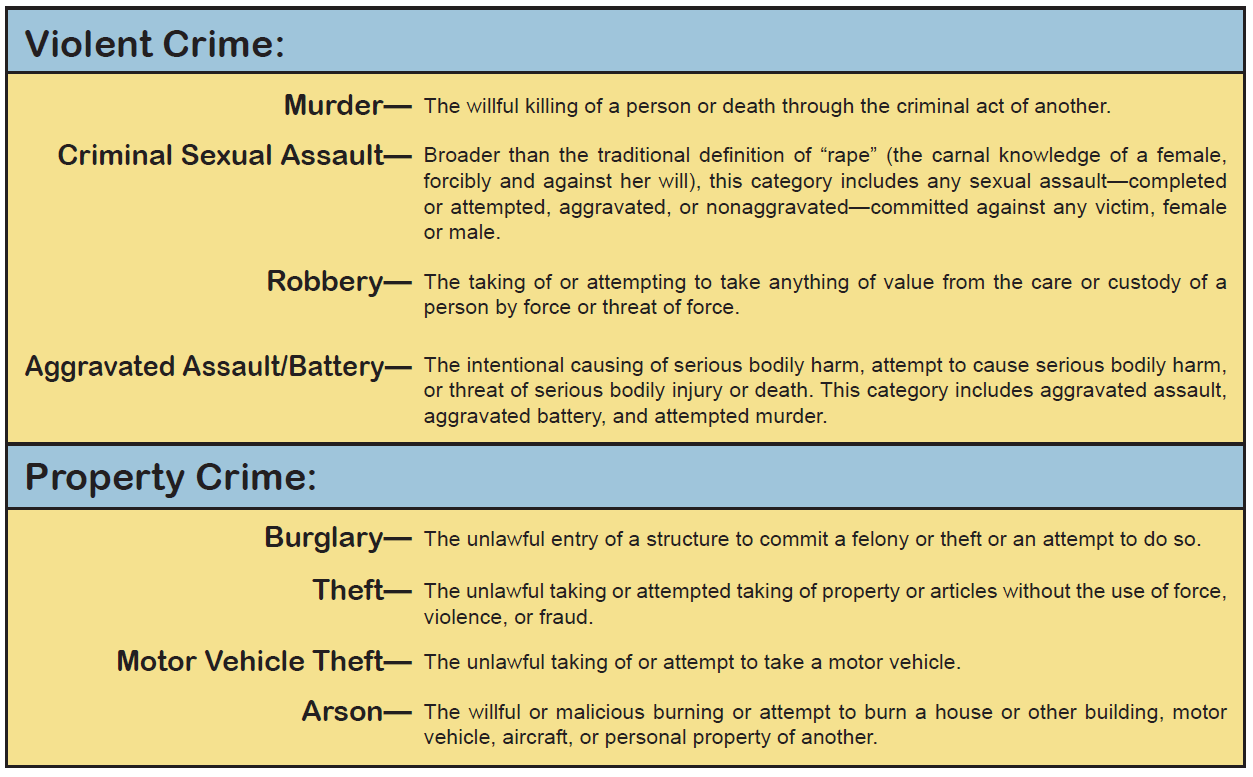


# Chicago Crimes Dataset

The CSV file for crimes dataset for  the city of Chicago is obtained from the data portal for the city of Chicago. Here is the link for the city of Chicago data portal __[City of Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2)__ 




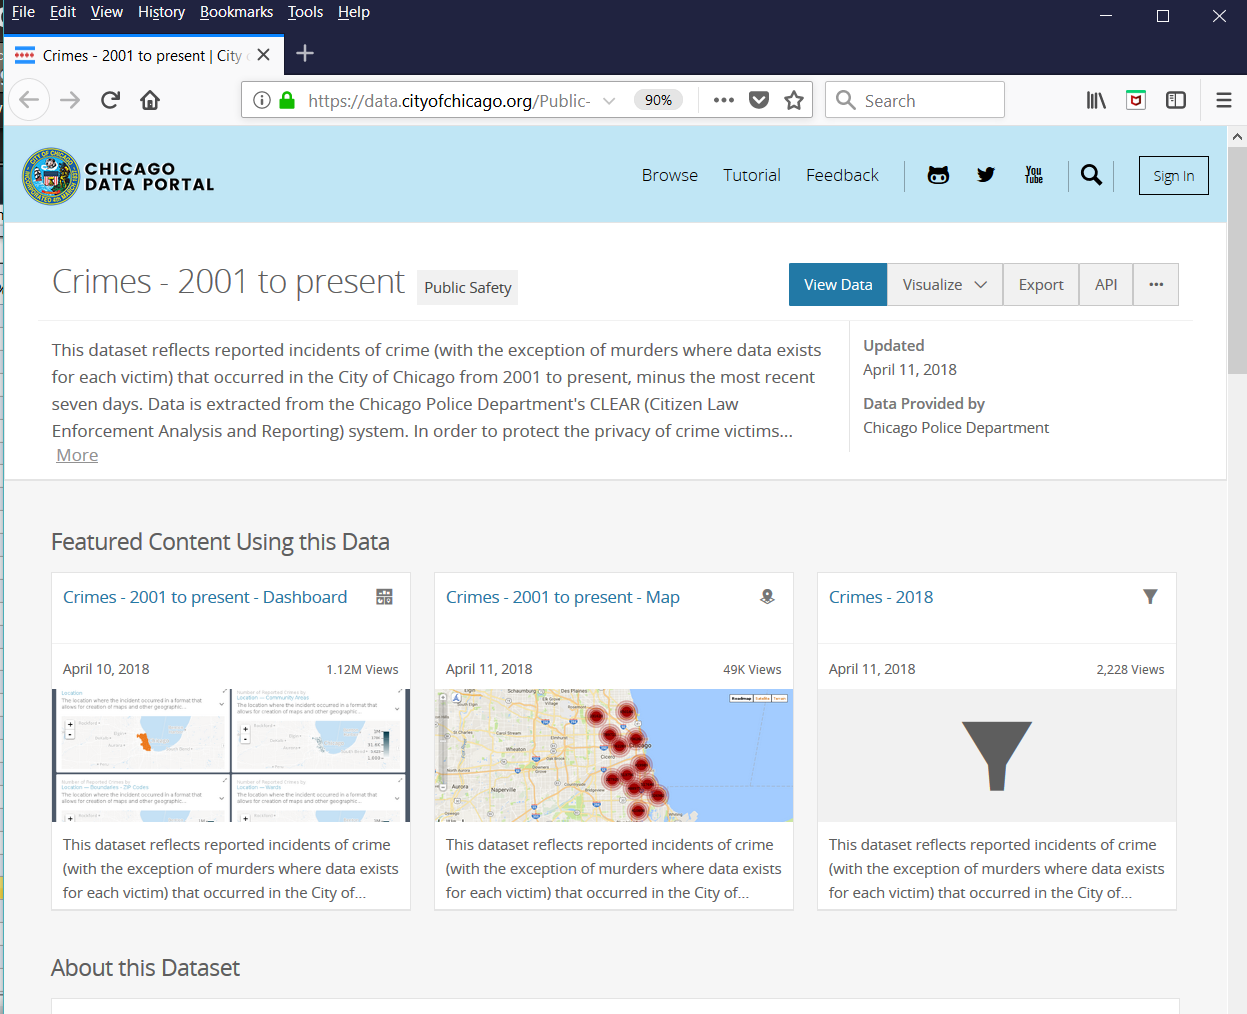

### Loading the Dataset CSV file

Three set of data are need for this assignment:
1. The Chicago police stations in every district (hosted on NW server)
2. The Crimes dataset (hosted on NW server)
3. The Boundaries.geojson data for district boundries (downloaded in Zip file)

Complete description of the dataset can be found on Chicago city data portal.

Based on Trumps State of the Uniion Address and the article written by columnist Clarence Page and published by the Chicago Tribune, we are interested to retrieve the data for the past two years and perform different types of spatial queries.

There are few of these queries that we are interested in to help CPD and city of Chicago to plot on a Choroplteh map those districts that have highest gun crimes. 

Here are examples of those types of queries:

1. Plot on **Choropleth map** the **districts** and their **Violent Crimes**
2. Plot on Choropleth map the districts and their **Gun** related crimes
3. Which district is the **crime capital** of **Chicago districts**?
4. What the **crime density** per **district**?
5. Plot on Choropleth map those **gun related crimes** that resulted in **arrests**
5. Plot on Choropleth map the gun related crime that is in the **farthest Block**  from the **policy stattion** for every **district**  




Packages you need to Connect **PostgreSQL** server to load and retrieve Crhicago Crime dataset from the database:
<font color = purple>
1. **psycopg2:** for PostgreSQL driver
2. **area:** to calculate the area inside of any GeoJSON geometry
3. **Folium:** for Choropleth maps </font>


Since we are using PostGIS in our work, please read and bookmark __[Chapter 4. Using PostGIS: Data Management and Queries](https://postgis.net/docs/manual-1.4/ch04.html)__ 


In [ ]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install psycopg2

# if you are on a Mac and the above fails, use code below
#!{sys.executable} -m pip install psycopg2-binary

In [ ]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install area

In [ ]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install folium

In [2]:
import folium
from folium import plugins
from folium.plugins import MarkerCluster
import psycopg2
import csv
import pandas as pd
import json
from area import area

from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT 
from IPython.display import display

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
folium.__version__

'0.12.1'

In [4]:
psycopg2.__version__

'2.8.6 (dt dec pq3 ext lo64)'

# IMPORTANT NOTES:

- In this assignment you will be connecting to DSCC PostgreSQL server that has the database and tables already created on the server. 
- You need to use your NetID and password for login and passward to connect PostgreSQL server hosted on DSCC
- For the psycopg2.connect statements listed below, you must provide your NetID and password in order to connect to PostgreSQL server hosted on DSCC

In [6]:
# Use this data set for your final submission of your Assignment 3
# Uncomment the following line after you unit test your code and ready to run and submit your assignment on this dataset 

# db_connection = psycopg2.connect(host='129.105.248.26',dbname="chicago_crimes", user="YourNetID")

# =======================================================================================================

# Use the following dataset for unit testing purposes only. It takes roughly 5 minutes to complete.
# Comment the following line when you are done with your unit testing and ready to run your assignment on the complete dataset and submit your Assignment 

db_connection = psycopg2.connect(host = '129.105.248.26',dbname = "chicago_crimes_ut", user = "YourNetID")
db_connection.set_session(autocommit = True)

cursor = db_connection.cursor()

In [ ]:
# Uncomment and run this code when your transactions get "stuck"
#db_connection.rollback()

### Chicago Crimes Dataset

The Crimes_2001_to_present.csv is downloaded from Chicago data portal and it has roughly 6.5 million records.

While working on this dataset, It is prudent to make a note of the following:
1. Geospatial  queries are very demanding for system resouces like CPU, Memory, and DISK
2. We are interested in the data set of the past 2 years, and when you execute Geospatial type queries, please be advised that these queries slow down your machine. 
3. There are two dataset that you will use in this assignment
    - **chicago_crimes_ut**  : Use this  mini dataset that has data for rougly a month for coding/debugging and unit testing
    - **chicago_crimes** : Use this dataset that has data for 2 years for your final submission



### Algorithm Performance

- **Sort algorithms** used by the database engines vary in performance between O($N log N$) and O($ N^{2} $) where $N$ is the size of the number

- **Search algorithms** used by the database engines vary in performance between O($log N$) and O($ N $) where $N$ is the size of the number




### What are the column names in the 2 tables that we will use from chicago_crimes database?

In [ ]:
# Get the column names for table crimes

cursor.execute("SELECT column_name \
    FROM INFORMATION_SCHEMA.COLUMNS \
    WHERE table_name = 'crimes';")

rows=cursor.fetchall()

rows

In [ ]:
# Get the column names for table police_stations

cursor.execute("SELECT column_name \
    FROM INFORMATION_SCHEMA.COLUMNS \
    WHERE table_name = 'police_stations';")

rows=cursor.fetchall()

rows

In [ ]:
# Get the first five rows of the police station table
query = "SELECT * \
        FROM police_stations"
stations = pd.read_sql_query(query, db_connection)
stations.head()

In [ ]:
# Another way to get the police station table

query = "SELECT * \
        FROM police_stations"
cursor.execute(query)
data = cursor.fetchall()
colnames = [desc[0] for desc in cursor.description]
# create a data frame with column headers
stations = pd.DataFrame(data,columns = colnames).drop_duplicates()

stations

In [ ]:
# store districts (excluding Headquarters) for later use
districts = stations.query("district != 'Headquarters'").district
districts

In [ ]:
# Display the first 5 rows in the crimes table

query = "SELECT * \
        FROM crimes"
chicago = pd.read_sql_query(query, db_connection)
chicago.head()

In [ ]:
# Another way to get the crimes table

query = "SELECT * \
        FROM crimes"
cursor.execute(query)
data = cursor.fetchall()
colnames = [desc[0] for desc in cursor.description]
# create a data frame with column headers
chicago = pd.DataFrame(data,columns = colnames)
chicago.columns

In [ ]:
chicago.head()

**DATA DICTIONARY (CRIMES)** (See https://www.kaggle.com/currie32/crimes-in-chicago)

**id** - Unique identifier for the record.

**caseno** - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.

**date_of_occurence** - Date when the incident occurred. this is sometimes a best estimate.

**block - The partially redacted address where the incident occurred, placing it on the same block as the actual address.

**iucr** - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.

**primary_type** - The primary description of the IUCR code.

**description** - The secondary description of the IUCR code, a subcategory of the primary description.

**location-description** - Description of the location where the incident occurred.

**arrest** - Indicates whether an arrest was made.

**domestic** - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

**beat** - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.

**district** - Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.

**ward** - The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.

**community_area** - Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.

**fbi_cd** - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.

**xcoordinate** - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

**ycoordinate** - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

**year** - Year the incident occurred.

**updated_on** - Date and time the record was last updated.

**latitude** - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

**longitude** - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

**location** - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

In [ ]:
chicago.info()

In [ ]:
chicago.head()

In [ ]:
# use value_counts to see the values of the field
chicago['year'].value_counts()

In [ ]:
# what is in the field domestic
chicago['domestic'].value_counts()

In [ ]:
# let's look at how many crimes are domestic by primary type
pd.crosstab(chicago['primary_type'], chicago['domestic'], margins=True)

In [ ]:
# percentages would be more informative
# ------ lambda expressions section 4.7.6 ('syntactic sugar for a normal function definition')
# https://docs.python.org/3/tutorial/controlflow.html
pd.crosstab(chicago['primary_type'], chicago['domestic']).apply(lambda x: x/x.sum(), axis = 1)

## Lets start executing different  Queries

# Query #1:
- Calculate the total number of **crimes** in every district and plot that on Choropleth map. In other words, create a Choropleth map where the districts are shaded in proportion to the number of **crimes** in that district.

In [ ]:
# Get the total number of crimes per district. 
# Since each row corresponds to a crime, we just need to count the number of rows per district.
cursor.execute("SELECT district, count(district) \
                FROM crimes \
                GROUP BY district")
rows = cursor.fetchall()

In [ ]:
# Create a dataframe from the results of the query.
crimes_per_district = pd.DataFrame(rows, columns=['dist_num','number_of_crimes'])
crimes_per_district['dist_num'] = crimes_per_district['dist_num'].astype(str)

crimes_per_district

In [ ]:
# For each district, excluding HQ, we get the latitude/longitude of the police station at the district.
# With a few exceptions, will be inserting markers on the map at these police station locations
cursor.execute("""SELECT ST_X(ST_AsText(Where_IS)), ST_Y(ST_AsText(Where_IS)), district \
            FROM police_stations \
            WHERE district!='Headquarters'""")
police_stations = cursor.fetchall()

# Create a dataframe with this information.
station_locations = pd.DataFrame(police_stations,columns=['st_latitude','st_longitude','dist_num']).drop_duplicates()

station_locations


In [ ]:
# Add columns for the coordinates of each distract. Again, this is going to be the locations of our markers.
query1_df = pd.merge(crimes_per_district, station_locations,on='dist_num')
query1_df

# Creating the folium maps

In [ ]:
# Create a folium map centered on "downtown Chicago"
total_number_of_crimes_per_district_map = folium.Map(location = (41.8781, -87.6298),zoom_start = 11)

In [ ]:
# Create a folium map centered on "downtown Chicago". The boundaries of each distrct are stored in "Boundaries.geojson". 
# Use this data to draw the district regions on the folium map.
# Then shade each region "orange red" with the intensity of the color corresponding to the number of crimes.
# Remember the number of crimes per district is stored in the number_of_crimes column of crimes_per_district.
# We add this "choropleth layer" to our folium map.
folium.Choropleth(geo_data = "Boundaries.geojson", 
              fill_color = 'OrRd', 
              fill_opacity  =0.5, 
              line_opacity= 1,
              data = crimes_per_district,
              key_on = 'feature.properties.dist_num',
              columns = ['dist_num', 'number_of_crimes'],
              legend_name = "CRIMES PER DISTRICT"
              ).add_to(total_number_of_crimes_per_district_map)

In [ ]:
# We iterate over the rows in the dataframe creating one marker per row.
# The ("popup") label for each district marker displays the district number and number of crimes.
# Each distric marker is added to the map at the district station's location.
for index, row in query1_df.iterrows():
    # location of police station
    police_station_location = (row['st_latitude'],row['st_longitude'])
    district = row['dist_num']
    num_crimes = row['number_of_crimes']
            
    # Create the marker and add it to the map.
    folium.Marker(location = police_station_location, 
    popup =\
    folium.Popup(html=f"District No : {district} has Total Number of Crimes: {num_crimes}",max_width=450)).\
    add_to(total_number_of_crimes_per_district_map)

- **Lets plot the Choropleth map and notice  the intensity of color on the different districts**
- **The Blue POPUP represents the location of police station in the different districts in the map**

In [ ]:
# Display the finished map.
total_number_of_crimes_per_district_map

## Query #2:
* Calculate the total number of **violent crimes** in every district and plot that in a **table** on Choropleth map. In other words, create a Choropleth map where the districts are shaded in proportion to the number of **violent crimes** in that district. 

**Note**: A crime is considered a **violent crime** if the **PRIMARY_TYPE** of the crimes is  `THEFT` ,`ASSAULT`,`ROBBERY`,`KIDNAPPING`,`CRIM SEXUAL ASSAULT`,`BATTERY`, or `MURDER`.

* Then find the total number of crimes in the district for each of these primary types of violent crime and add a popup marker (located at that district's police headquarter) that displays a DataFrame containing this data.

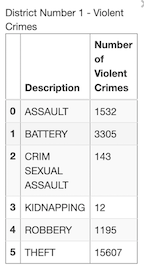

In [ ]:
violent_crime_categories = 'THEFT','ASSAULT','ROBBERY','KIDNAPPING','CRIM SEXUAL ASSAULT','BATTERY','MURDER'

In [ ]:
# Get the total number of violent crimes per district. This info will populate the legend.
cursor.execute("SELECT district, count(district)\
                FROM crimes \
                WHERE PRIMARY_TYPE in %s \
                GROUP BY district",[violent_crime_categories])
rows=cursor.fetchall()
violent_crime_data=pd.DataFrame(rows, columns=['dist_num','number_of_violent_crimes'])
violent_crime_data['dist_num'] = violent_crime_data['dist_num'].astype(str)
violent_crime_data

Now, lets create a dataframe of the **different types of violent crimes for every district** 

In [ ]:
cursor.execute(f"SELECT district, PRIMARY_TYPE, count(PRIMARY_TYPE) \
                    FROM crimes \
                    WHERE PRIMARY_TYPE in {violent_crime_categories} \
                    GROUP BY distrIct,PRIMARY_TYPE")
rows=cursor.fetchall()
violent_crime_type = pd.DataFrame(rows, columns=['dist_num','Description','number_of_violent_crimes'])
violent_crime_type['dist_num'] = violent_crime_type['dist_num'].astype(str)
violent_crime_type

In [ ]:
# This time our dataframe will contain one row for each district and each type of violent crime.
# For each distrct number and type of violent crime our dataframe will have the total of violent crimes of that type.
# We once again include the stations location since that is where the markers will appear on the map.
query2_df = pd.merge(violent_crime_type, station_locations,on='dist_num')
query2_df

In [ ]:
districts

Create a folium map centered on "downtown Chicago". The boundaries of each distrct are stored in "Boundaries.geojson". 
Use this data to draw the district regions on the folium map.
Then shade each region "orange red" with the intensity of the color corresponding to the number of crimes.
Remember the number of crimes per district is stored in the number_of_crimes column of crimes_per_district. We add this "chropleth layer" to our folium map.

# Creating the folium maps

In [ ]:
# Create a folium map centered on "downtown Chicago". The boundaries of each distrct are stored in "Boundaries.geojson". 
# Use this data to draw the district regions on the folium map.
# Then shade each region "orange red" with the intensity of the color corresponding to the number of crimes.
# Remember the number of crimes per district is stored in the number_of_crimes column of crimes_per_district.
# We add this "choropleth layer" to our folium map
violent_crimes_per_district_map= folium.Map(location =(41.8781, -87.6298),zoom_start=11)
folium.Choropleth(geo_data="Boundaries.geojson", 
              fill_color='YlOrRd', 
              fill_opacity=0.5, 
              line_opacity=1,
              data = violent_crime_data, #data source changed from first example
              key_on='feature.properties.dist_num',
              columns = ['dist_num', 'number_of_violent_crimes'],
              legend_name = "VIOLENT CRIMES PER DISTRICT"
              ).add_to(violent_crimes_per_district_map)

In addition, for each district find the block(s) that has the highest number of gun crimes in that district. Note that there might be a tie for the highest number of gun crimes. You need to find **all** such blocks. Add a popup marker (located at that district's police headquarter) that displays a DataFrame containing all such block along with the number of gun crimes for that block (i.e. the highest number of crimes for a district).

In [ ]:
# We iterate over district numbers and get all the rows in query2_df with that district number.
# This new dataframe contains the number of crimes for each of violent crime types in a particular district.
# We convert this dataframe to "html" which will be displayed in marker label (along with the district number)
# Each distric marker is added to the map at the district station's location like before.

#districts = query2_df.dist_num.unique()
for district in districts:
    df2d = query2_df[query2_df.dist_num == district]  # new dataframe to add to marker.

    police_station_location = tuple(df2d[['st_latitude','st_longitude']].values[0])

    violent_crimes_per_district_df = df2d[['Description','number_of_violent_crimes']]
    # Convert out new data frame to html before inserting it into the label.
    header = violent_crimes_per_district_df.to_html(classes=
                    'table table-striped table-hover table-condensed table-responsive')
    # Create the folium marker and add it to the map.
    folium.Marker(location=police_station_location, popup=folium.\
                  Popup(html=f"District Number {district} - Violent Crimes {header}")).\
                  add_to(violent_crimes_per_district_map)

    # Create the marker and add it to the map.
    folium.Marker(location = police_station_location, 
    popup =\
    folium.Popup(html=f"District No : {district} - Violent Crimes {header}",max_width=450)).\
    add_to(violent_crimes_per_district_map)

In [ ]:
# Display the finished map.
violent_crimes_per_district_map

## Query #3:

- Calculate the total number of **gun related violent crimes** in every district and plot that in a table on Choropleth map.

**Note**: A crime is considered a **gun related violent crime** if the word "gun" is contained in the **DESCRIPTION** and the **PRIMARY_TYPE** of the crimes is  `THEFT` ,`ASSAULT`,`ROBBER`,`KIDNAPPING`,`CRIM SEXUAL ASSAULT`,`BATTERY`, or `MURDER`.

* Then find the total number of crimes in the district for the different DESCRIPTIONs containing the word "gun" and add a popup marker (located at that district's police headquarter) that displays a DataFrame containing this data.


Lets first create a dataframe of gun crimes per district first to get an idea about the number of gun crimes per district


In [ ]:
# isolate violent gun crime
gun='%GUN%'
cursor.execute(f"SELECT district, count(district)\
                FROM crimes\
                WHERE PRIMARY_TYPE in {violent_crime_categories}\
                AND DESCRIPTION::text LIKE '{gun}' GROUP BY district")
districts_violent_gun_crimes = cursor.fetchall()
districts_violent_gun_crimes_df = pd.DataFrame(districts_violent_gun_crimes, columns=['dist_num','violent_gun_crimes'])
districts_violent_gun_crimes_df['dist_num'] = districts_violent_gun_crimes_df['dist_num'].astype(str)
districts_violent_gun_crimes_df.head()

Now, lets create a dataframe of the **different types of violent gun crimes for every district** 

In [ ]:
cursor.execute(f"SELECT district, DESCRIPTION, count(DESCRIPTION) \
                FROM crimes \
                WHERE PRIMARY_TYPE in {violent_crime_categories} AND DESCRIPTION::text LIKE '{gun}' \
                GROUP BY district, DESCRIPTION")
rows=cursor.fetchall()
violent_gun_crime_type = pd.DataFrame(rows, columns=['dist_num','Description','number_of_violent_gun_crimes'])
violent_gun_crime_type['dist_num'] = violent_gun_crime_type['dist_num'].astype(str)
violent_gun_crime_type.head()

In [ ]:
query3_df = pd.merge(violent_gun_crime_type, station_locations, on = 'dist_num')
query3_df.head()

# Creating the folium maps

In [ ]:
# Create a folium map centered on "downtown Chicago". The boundaries of each distrct are stored in "Boundaries.geojson". 
# Use this data to draw the district regions on the folium map.
# Then shade each region "orange red" with the intensity of the color corresponding to the number of crimes.
# Remember the number of crimes per district is stored in the number_of_crimes column of crimes_per_district.
# We add this "choropleth layer" to our folium map.# Create a folium map centered on "downtown Chicago"
districts_violent_gun_crimes_map = folium.Map(location =(41.8781, -87.6298),zoom_start=11)
folium.Choropleth(geo_data="Boundaries.geojson", 
              fill_color='YlOrRd', 
              fill_opacity=0.5, 
              line_opacity=1,
              data = districts_violent_gun_crimes_df,
              key_on='feature.properties.dist_num',
              columns = ['dist_num', 'violent_gun_crimes'],
              legend_name="VIOLENT GUN CRIME"
              ).add_to(districts_violent_gun_crimes_map)

In [ ]:
# districts = query3_df.dist_num.unique()
for district in districts:
    df3d = query3_df[query3_df.dist_num == district]
  
    police_station_location = tuple(df3d[['st_latitude','st_longitude']].values[0])

    violent_gun_crimes_per_district_df = df3d[['Description','number_of_violent_gun_crimes']]
    
    header = violent_gun_crimes_per_district_df.to_html(classes=
                    'table table-striped table-hover table-condensed table-responsive')

    folium.Marker(location=police_station_location, popup=folium.\
                  Popup(html=f"District Number {district} - Violent GUN Crimes {header}")).\
                  add_to(districts_violent_gun_crimes_map)

    folium.Marker(location = police_station_location, 
    popup =\
    folium.Popup(html=f"District No : {district} - Violent Gun Crimes {header}",max_width=450)).\
    add_to(districts_violent_gun_crimes_map)

In [ ]:
districts_violent_gun_crimes_map

## Query #4:
- Calculate the crime density per district

In [ ]:
district = []
tarea=[]

with open('Boundaries.geojson') as f:
    data = json.load(f)
    a = data['features'] # a is a list of district data (dictionaries)
    for i in range(len(a)):
        obj = a[i]['geometry'] # list of coordinates defining the ith district boundary
        n = a[i]['properties'] # dictionary with district number and district label keyes for ith district
        district.append(n['dist_num']) # add district number to the district list
        tarea.append(area(obj)/10000) # add the the area (in hectares) to area list

af = pd.DataFrame({'dist_num': district,'district_area_inHectares':tarea})
af['dist_num'] = af['dist_num'].astype(str)
final_data= pd.merge(af, crimes_per_district, on='dist_num', how='inner')
final_data['crime_density'] = round(final_data['number_of_crimes']/(final_data['district_area_inHectares']/100))
final_data

## Query #5:
- Create **Marker Clusters** on Choropleth map for those **gun related crimes** that resulted in **arrest (green icon)** and those that **didn't (red icon)**

In [ ]:
# isolate gun crime
gun='%GUN%'
cursor.execute(f"SELECT district, count(district)\
                FROM crimes\
                WHERE DESCRIPTION::text LIKE '{gun}' GROUP BY district")
districts_gun_crimes = cursor.fetchall()
districts_gun_crimes_df = pd.DataFrame(districts_gun_crimes, columns=['dist_num','gun_crimes'])
districts_gun_crimes_df['dist_num'] = districts_gun_crimes_df['dist_num'].astype(str)
districts_gun_crimes_df.head()

In [ ]:
# This time our dataframe will contain one row for each district and each block in the district.
# Each row contains information about a particular gun crime including the block in which the crime occured.
# We also save the location of the crime incidendent and whether there was an arrest.
# We will use this information when creating the markers. 
# In particular, markers will be positioned at the crime location instead of police station location.
data= []
for district in districts:
    cursor.execute("""SELECT DISTINCT ON(caseno) caseno, block, DESCRIPTION, count(arrest), arrest,latitude,longitude\
                FROM crimes\
                WHERE district = %s and DESCRIPTION::text LIKE %s \
                GROUP BY caseno, block, DESCRIPTION,arrest, latitude, longitude""",[district,gun])
    results = cursor.fetchall()
    
    # insert the district number as the first element of each result list
    gun_crimes_per_district = [[district]+list(result) for result in results]
    data += (gun_crimes_per_district)

gun_crimes_per_district_df = pd.DataFrame(data, columns=['dist_num','caseno','block',\
'Description','arrest_count', 'arrest', 'latitude', 'longitude'])
gun_crimes_per_district_df['dist_num'] = gun_crimes_per_district_df['dist_num'].astype(str)
gun_crimes_per_district_df.shape

In [ ]:
# Simpified the query...a small nuber of casenos appear up to 4 times. 
# I just kept one of them assuming that, at least, the value of arrest is the same for all.
# But this assertio has not been verified. 

# This time our dataframe will contain one row for each district and each block in the district.
# Each row contains information about a particular gun crime including the block in which the crime occured.
# We also save the location of the crime incidendent and whether there was an arrest.
# We will use this information when creating the markers. 
# In particular, markers will be positioned at the crime location instead of police station location.
data= []
for district in districts:
    cursor.execute(f"""SELECT  DISTINCT ON(caseno) caseno, block, DESCRIPTION, arrest,latitude,longitude\
                FROM crimes\
                WHERE district = {district} and DESCRIPTION::text LIKE '{gun}'""")
    results = cursor.fetchall()
    
    # insert the district number as the first element of each result list
    gun_crimes_per_district = [[district]+list(result) for result in results]
    data += (gun_crimes_per_district)

gun_crimes_per_district_df = pd.DataFrame(data, columns=['dist_num','caseno','block',\
'Description','arrest', 'latitude', 'longitude'])
gun_crimes_per_district_df['dist_num'] = gun_crimes_per_district_df['dist_num'].astype(str)
gun_crimes_per_district_df.shape

In [ ]:
gun_crimes_per_district_df.head()

# Creating the folium maps

In [ ]:
# Create a folium map centered on "downtown Chicago". The boundaries of each distrct are stored in "Boundaries.geojson". 
# Use this data to draw the district regions on the folium map.
# Then shade each region "orange red" with the intensity of the color corresponding to the number of crimes.
# Remember the number of crimes per district is stored in the number_of_crimes column of crimes_per_district.
# We add this "choropleth layer" to our folium map.
gun_crime_arrests_map = folium.Map(location =(41.8781, -87.6298),zoom_start=11)
folium.Choropleth(geo_data="Boundaries.geojson", 
              fill_color='YlOrRd', 
              fill_opacity=0.5, 
              line_opacity=1,
              data = districts_gun_crimes_df, #using data from Query 3
              key_on='feature.properties.dist_num',
              columns = ['dist_num', 'gun_crimes'],
              legend_name="GUN CRIME"
              ).add_to(gun_crime_arrests_map)
marker_cluster = MarkerCluster().add_to(gun_crime_arrests_map)

In [ ]:
# We create a marker for each gun crime--"green" if there was an arrest and "red" otherwise.

gun='%GUN%'
for district in districts:
    gun_crimes_per_district_df2 = gun_crimes_per_district_df[gun_crimes_per_district_df.dist_num==district]
    
    for index, row in gun_crimes_per_district_df2.iterrows():
        description = row['Description']
        block = row['block']
        loc = (row['latitude'],row['longitude'])
#         print("District No: %s <br> Description: %s <br> Block: %s" %(district,description,block))
        if row['arrest']==True: 
            folium.Marker(location=loc,popup = folium.Popup(html=\
                f"District No: {district} <br> Description: {description} <br> Block: {block}"),\
                          icon=folium.Icon(color='green', icon='ok-sign'),).add_to(marker_cluster)
#             print(f"District {district} green marker at {loc}")
        else:
            folium.Marker(location=loc, popup = folium.Popup(html=
                 f"District No: {district} <br> Description: {description} <br> Block: {block}"),\
                          icon=folium.Icon(color='red',icon='remove-sign'),).add_to(marker_cluster)
 

In [ ]:
gun_crime_arrests_map

## Query #6:
- Plot on Choropleth map the **farthest Block** that has a gun crime from every police station in every district 

Locate the **farthest** gun crime from the police station in every district. Create a Choropleth map where the districts are shaded in proportion to the number of **gun crimes** in that district. For each district, find the gun crime that was **farthest** from police station. Add a pop-up on the Choropleth map to display the district number and the Block where the **farthest** gun crime occurred. Also add circle marker (of radius 5) at the location of the **farthest** gun crime.

In [ ]:
# This complex query returns for each block in each district the gun crime which occured furthest
# from the police station. We also store this distance together with the police station location.
# Once again we will be positioning the markers at the police station locations.
results= []
for district in districts:
    cursor.execute("""SELECT DISTINCT on (A.block) A.district,A.block, A.where_is,ST_Distance(A.where_is,B.where_is)\
FROM crimes as A, police_stations as B 
WHERE A.district=%s and DESCRIPTION::text LIKE %s and B.district= %s
                         and ST_Distance(A.where_is,B.where_is) 
IN 
    ( SELECT max(dist) 
    FROM 
        (SELECT ST_Distance(A.where_is,B.where_is) as dist 
        FROM crimes as A, police_stations as B 
        WHERE A.district=%s and DESCRIPTION::text LIKE %s and B.district= %s ) as f)""",
               [district,gun,district,district,gun, district])

    farthest_block_gun_crime = list(cursor.fetchall()[0])
    cursor.execute(f"SELECT ST_X(ST_AsText(%s)), ST_Y(ST_AsText(%s))"
                   ,(farthest_block_gun_crime[2],farthest_block_gun_crime[2]))
    farthest_block_gun_crime[2:3] = cursor.fetchall()[0]
    
    results.append(farthest_block_gun_crime)

farthest_gun_crime_df = pd.DataFrame(results,columns=['dist_num','block','crime_lat','crime_long','dist'])
farthest_gun_crime_df['dist_num']= farthest_gun_crime_df['dist_num'].astype(str)
query6_df = pd.merge(farthest_gun_crime_df, station_locations,on='dist_num')
query6_df.head()
 


# Creating the folium maps

In [ ]:
# Create a folium map centered on "downtown Chicago". The boundaries of each distrct are stored in "Boundaries.geojson". 
# Use this data to draw the district regions on the folium map.
# Then shade each region "orange red" with the intensity of the color corresponding to the number of crimes.
# Remember the number of crimes per district is stored in the number_of_crimes column of crimes_per_district.
# We add this "choropleth layer" to our folium map.
farthest_block_gun_crime_map = folium.Map(location =(41.8781, -87.6298),zoom_start=11)
folium.Choropleth(geo_data="Boundaries.geojson", 
              fill_color='YlOrRd', 
              fill_opacity=0.5, 
              line_opacity=1,
              data = districts_gun_crimes_df,
              key_on='feature.properties.dist_num',
              columns = ['dist_num', 'gun_crimes'],
              legend_name="GUN CRIME"
              ).add_to(farthest_block_gun_crime_map)

 

In [ ]:
# This time we place a circle markers at the crime locations in addition to the "regular" markers at the
# police station locations.

for district in districts:

    data = query6_df.loc[query6_df.dist_num==district]
#    print(data)
#     print(data['block'].values)

    block, crime_lat, crime_long, dist, police_lat, police_long =\
    data['block'].values[0], data['crime_lat'].values[0], data['crime_long'].values[0],\
    data['dist'].values[0], data['st_latitude'].values[0], data['st_longitude'].values[0]
    
    folium.CircleMarker((crime_lat,crime_long),radius=5,color='#ff3187',
                       popup=folium.Popup(html=f"District No.: {district} <br> Block:{block}")).\
                       add_to(farthest_block_gun_crime_map)


    folium.Marker(location=(police_lat,police_long),
                  popup=folium.Popup(\
                 html=f"Police Station <br> District No.: {district} <br> Farthest Gun_Crime Block:{block}")).\
                  add_to(farthest_block_gun_crime_map)

farthest_block_gun_crime_map

<div class="alert alert-warning">

# Requirements

** The HTML document your are submitting must have the source code and the output for the following  requirements **
</div>

### Requirement #1: (10 points)

- Use SQL to select all rows of data with the following fields from crimes - district, ward, arrest, primary_type and location_description. 
- Create a dataframe called **new_df** with the selected fields.
- Make sure you name the columns in the dataframe.
- Show your **new_df** using info() and head().

### Requirement #2: (10 points)

- Using **new_df**, show a crosstab of **primary_type** with the variable called **arrest**; Show the results as percentages.
- Use a Markdown cell to comment on what the results for the crime type of **Assault** tell us.

### Requirement #3:  (10 points)
- Calculate the gun crimes density in every district. (See **Query 4**.)

<div class="alert alert-block alert-info"> For Requirements 4 and 5, consider following the steps illustrated in the Queries:

<ul>
  <li>Create the data frame with the appropriate marker data.</li>
  <li>Create the folium base map.</li>
  <li>Add the Choropleth layer.</li>
  <li>Iterate over the data frame you created to place the markers on the folium map.</li>
   <li>Show the final map.</li>
</ul>
</div>

### Requirement #4: (15 points)

- Using Query #2 as an example, create a Choropleth map for the **violent crimes** that **resulted in an arrest.**
- The pins should be placed at the police station for each district.
- The legend should reflect the total violent crime count per district.
- The popup should show the number of total violent crimes per hour interval for that district. If you choose to extract the hour from date_of_occurrence using SQL, check out https://www.postgresql.org/docs/current/functions-datetime.html.

<div>
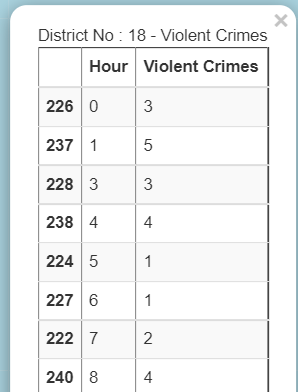
</div>

### Requirement #5: (15 points) 

- Create **Marker Clusters** on Choropleth map for those **gun related crimes** that have Location Description as RESIDENCE in **(green icon)** and those that have Location Description as STREET in **(red icon)** (See **Query 5**.) 
- The legend should also reflect gun related crimes for STREET and RESIDENCE only.
- **Make sure to place the markers at the crime location.**

### Requirement #6: (10 points)

- Create a seaborn scatterplot to show `THEFT`, `BATTERY`, `ASSAULT`, `ROBBERY` by the hour of the day. (Reference: https://seaborn.pydata.org/generated/seaborn.scatterplot.html)
- You can use SQL and/or Python to prepare the data for the plot.  If you choose to extract the hour from date_of_occurrence using SQL, check out https://www.postgresql.org/docs/current/functions-datetime.html.
- Number of crimes will be on the y-axis and hour of day will be on the x-axis. Be sure to provide a title and a legend for your plot.
- Using a markdown cell, explain the findings from the plot.
